This is an H1

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [45]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1) - 0.5
X_real = np.expand_dims(np.array([0, 2]), axis=1)
y_real = 4 + 3 * X_real

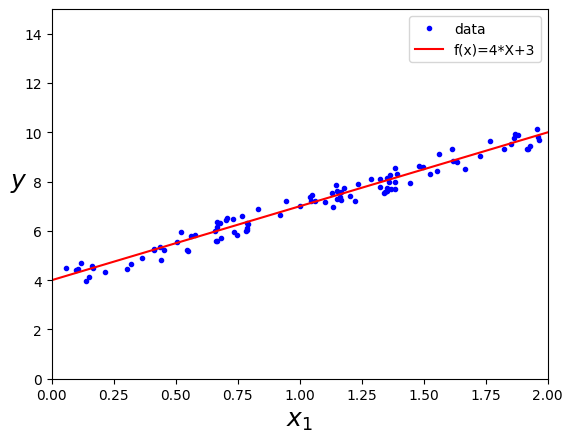

In [51]:
plt.plot(X, y, "b.", label='data')
plt.plot(X_real, y_real, "r-", label='f(x)=4*X+3')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [71]:
alpha = np.linspace(0, 10)
# alpha = np.expand_dims(alpha, axis=1)
beta = np.linspace(0, 10)
# beta = np.expand_dims(beta, axis=1)

In [73]:
a, b = np.meshgrid(alpha, beta)

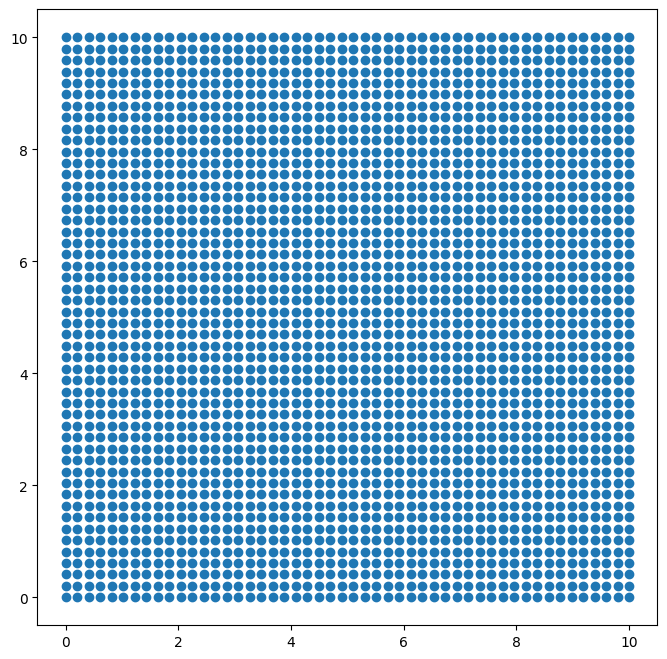

In [79]:
plt.figure(figsize=(8,8))
plt.scatter(a,b)
plt.show()